# Imports

In [1]:
import numpy as np
import pandas as pd

# Formatting data for plots
from datetime import datetime

# For outputting visualizations in notebook
%matplotlib inline

from bokeh.io import output_notebook
output_notebook()

# Plot functions
from utils.data_vis.hist import plot_hist
from utils.data_vis.scatter import plot_scatter, plot_scatter_variable_color
from utils.data_vis.timeseries import plot_timeseries

Loading BokehJS ...

# Load Data

In [2]:
start = datetime(2016, 2, 1)
end   = datetime(2016, 6, 7)

dfnames     = ["trump", "JohnKasich", "marcorubio", "tedcruz", "JebBush"]

dfs     = [pd.DataFrame for x in dfnames]
dfs_pri = [pd.DataFrame for x in dfnames]

for i, name in enumerate(dfnames):
    dfs[i] = pd.read_csv("./data/" + name + "_tweets.csv", encoding='mac_roman')
    dfs[i]["date"] =  pd.to_datetime(dfs[i]["date"], format="%m/%d/%Y")
    dfs_pri[i] = dfs[i][(dfs[i]["date"] > start) & (dfs[i]["date"] < end)].reset_index()
    dfs[i].name = name
    dfs_pri[i].name = name + "_primary"

In [3]:
# dfs[0]

# Generate Plots

### Sentiment Histograms

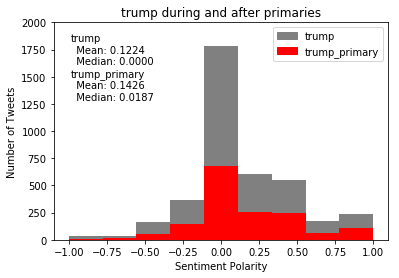

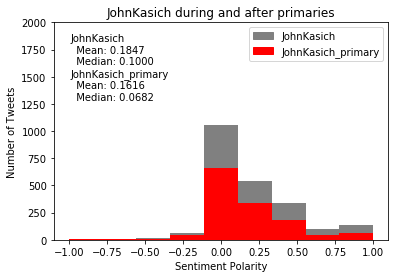

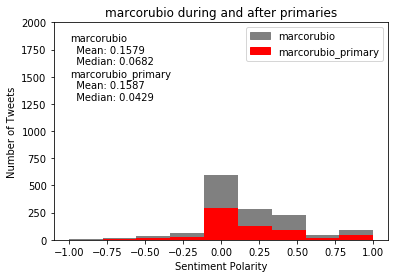

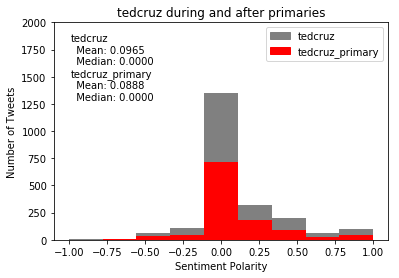

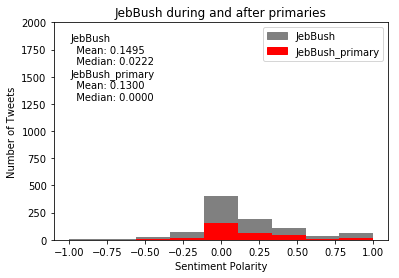

In [4]:
for i in range(len(dfs)):
    plot_hist([dfs[i], dfs_pri[i]], "sentiment_polarity", dfs[i].name + " during and after primaries", 
              "Sentiment Polarity", "Number of Tweets", ylim=2000, colors=["gray", "red"])

### Favorites vs Sentiment Scatter Plots

In [5]:
for candidate in dfs_pri:
    plot_scatter(candidate, "sentiment_polarity", "favorites", "Favorites vs Sentiment: (" + candidate.name + ")", 
                 "Sentiment Polarity", "Number of Favorites")

### Retweets vs Sentiment Scatter Plots

In [6]:
for candidate in dfs_pri:
    plot_scatter(candidate, "sentiment_polarity", "retweets", "Retweets vs Sentiment: (" + candidate.name + ")", 
                 "Sentiment Polarity", "Number of Retweets")

### Favorites vs Retweets Scatter Plots, with Sentiment Magnitude Color

In [7]:
for candidate in dfs_pri:
    plot_scatter_variable_color(candidate, "retweets", "favorites", "sentiment_polarity",
                                "Favorites vs Retweets: (" + candidate.name + ")", "Sentiment Polarity", "Number of Retweets")

In [8]:
# Favorites vs Date, with Sentiment Magnitude Color
for candidate in dfs_pri:
    plot_timeseries(candidate, "favorites", "sentiment_polarity", "Favorites Across Time - " + candidate.name, "Favorites")